This notebook contains the code and instructions to run Deep Potential Molecular Dynamics simualtions (DPMD) with the trained models of Alanine Dipeptide (ADP) using all the datasets and classical (CLC) and Ab initio single point calculation (SPC).

The main idea of this runs is to analyze the dihedral samples of ADP during the unbias DPMD simulation and compare it with the reference distribution of dihedrals. The main simulation script is 'ADP_Unbias_DPMD.in'. THis file contains importat simulation settings such as the temperature, timestep, siumulation time, and force field to be used. Inside this file you will find a commented par_coeff options that can be uncommented to use any of the trained forcefield for the simulations. 

For porposes of this tutorial we will keep working with the butane model Trained with the Uniform Distribution and the ab initio level of theory and 2500 frames, but the same approach will work for any of the other models. Change name of the title of the plot accordingly. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plumed

In [11]:
## Load dihedrals from unbias DPMD and reference simulation 
dihed_dpmd = plumed.read_as_pandas('colvar.dat')

## Load Dihedrals from Reference unbias run 
dihed_ref = plumed.read_as_pandas('ADP_Unbias_Reference.dat')


/tmp/ipykernel_13745/323354989.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  dihed_dpmd = plumed.read_as_pandas('colvar.dat')
/tmp/ipykernel_13745/323354989.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  dihed_ref = plumed.read_as_pandas('ADP_Unbias_Reference.dat')


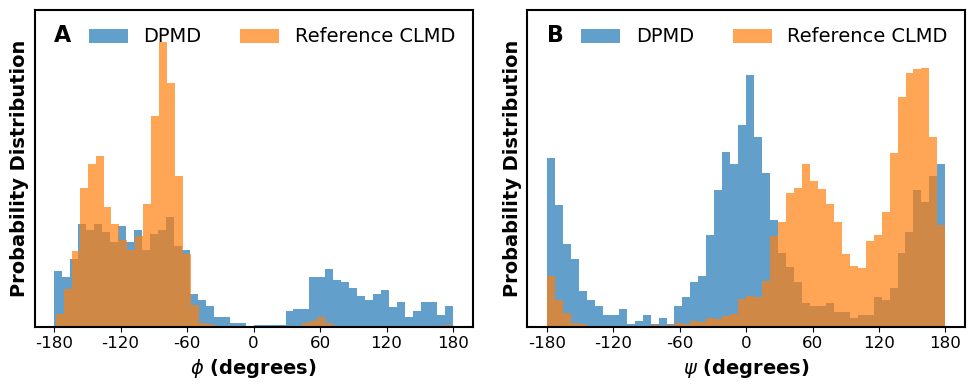

In [12]:
## Create a figure with two subplots, using the plots above

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

## Plot histogram of dihedral angles
ax1.hist(np.rad2deg(dihed_dpmd['phi']), bins=50,density=True, label='DPMD', alpha=0.7)
ax1.hist(np.rad2deg(dihed_ref['phi']), bins=50,density=True, label='Reference CLMD', alpha=0.7)

##add A label to plot
ax1.text(-180, 0.018, 'A', fontsize=16, fontweight='bold')

ax1.set_xlabel('$\phi$ (degrees)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Probability Distribution', fontsize=14, fontweight='bold')

## Hide y axis ticks
ax1.set_yticks([])
ax1.set_ylim(0,0.02)
ax1.legend(loc='upper right', frameon=False, fontsize=14, ncol=2)

## Increase tick size
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xticks(np.arange(-180, 180+60, 60))
ax1.set_xticklabels(np.arange(-180, 180+60, 60))

# bold splines
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

## Plot histogram of dihedral angles
ax2.hist(np.rad2deg(dihed_dpmd['psi']), bins=50,density=True, label='DPMD', alpha=0.7)
ax2.hist(np.rad2deg(dihed_ref['psi']), bins=50,density=True, label='Reference CLMD', alpha=0.7)

## Add B label to plot
ax2.text(-180, 0.0117, 'B', fontsize=16, fontweight='bold')

ax2.set_xlabel('$\psi$ (degrees)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Probability Distribution', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', frameon=False, fontsize=14, ncol=2)

## Hide y axis ticks
ax2.set_yticks([])
ax2.set_ylim(0,0.013)
## Increase tick size
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xticks(np.arange(-180, 180+60, 60))
ax2.set_xticklabels(np.arange(-180, 180+60, 60))

# bold splines
ax2.spines['top'].set_linewidth(1.5)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)

plt.tight_layout()
# plt.savefig('ADP_Unbias_DihedsCheck_Panels.png', dpi=400)
plt.show()
